In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import os
os.chdir(r'C:\Users\Aaron Cherian\Documents\Python Scripts')

In [33]:
data_train = pd.read_csv('train_selected.csv')
data_train.head()

id  cycle       s1      s2     s3      s4  ttf  label_bnc
0   1      1  1400.60  554.36  47.47  521.66  191          0
1   1      2  1403.14  553.75  47.49  522.28  190          0
2   1      3  1404.20  554.26  47.27  522.42  189          0
3   1      4  1401.87  554.45  47.13  522.86  188          0
4   1      5  1406.22  554.00  47.28  522.19  187          0

In [34]:
col_study = ['cycle','s1','s2','s3','s4','ttf']

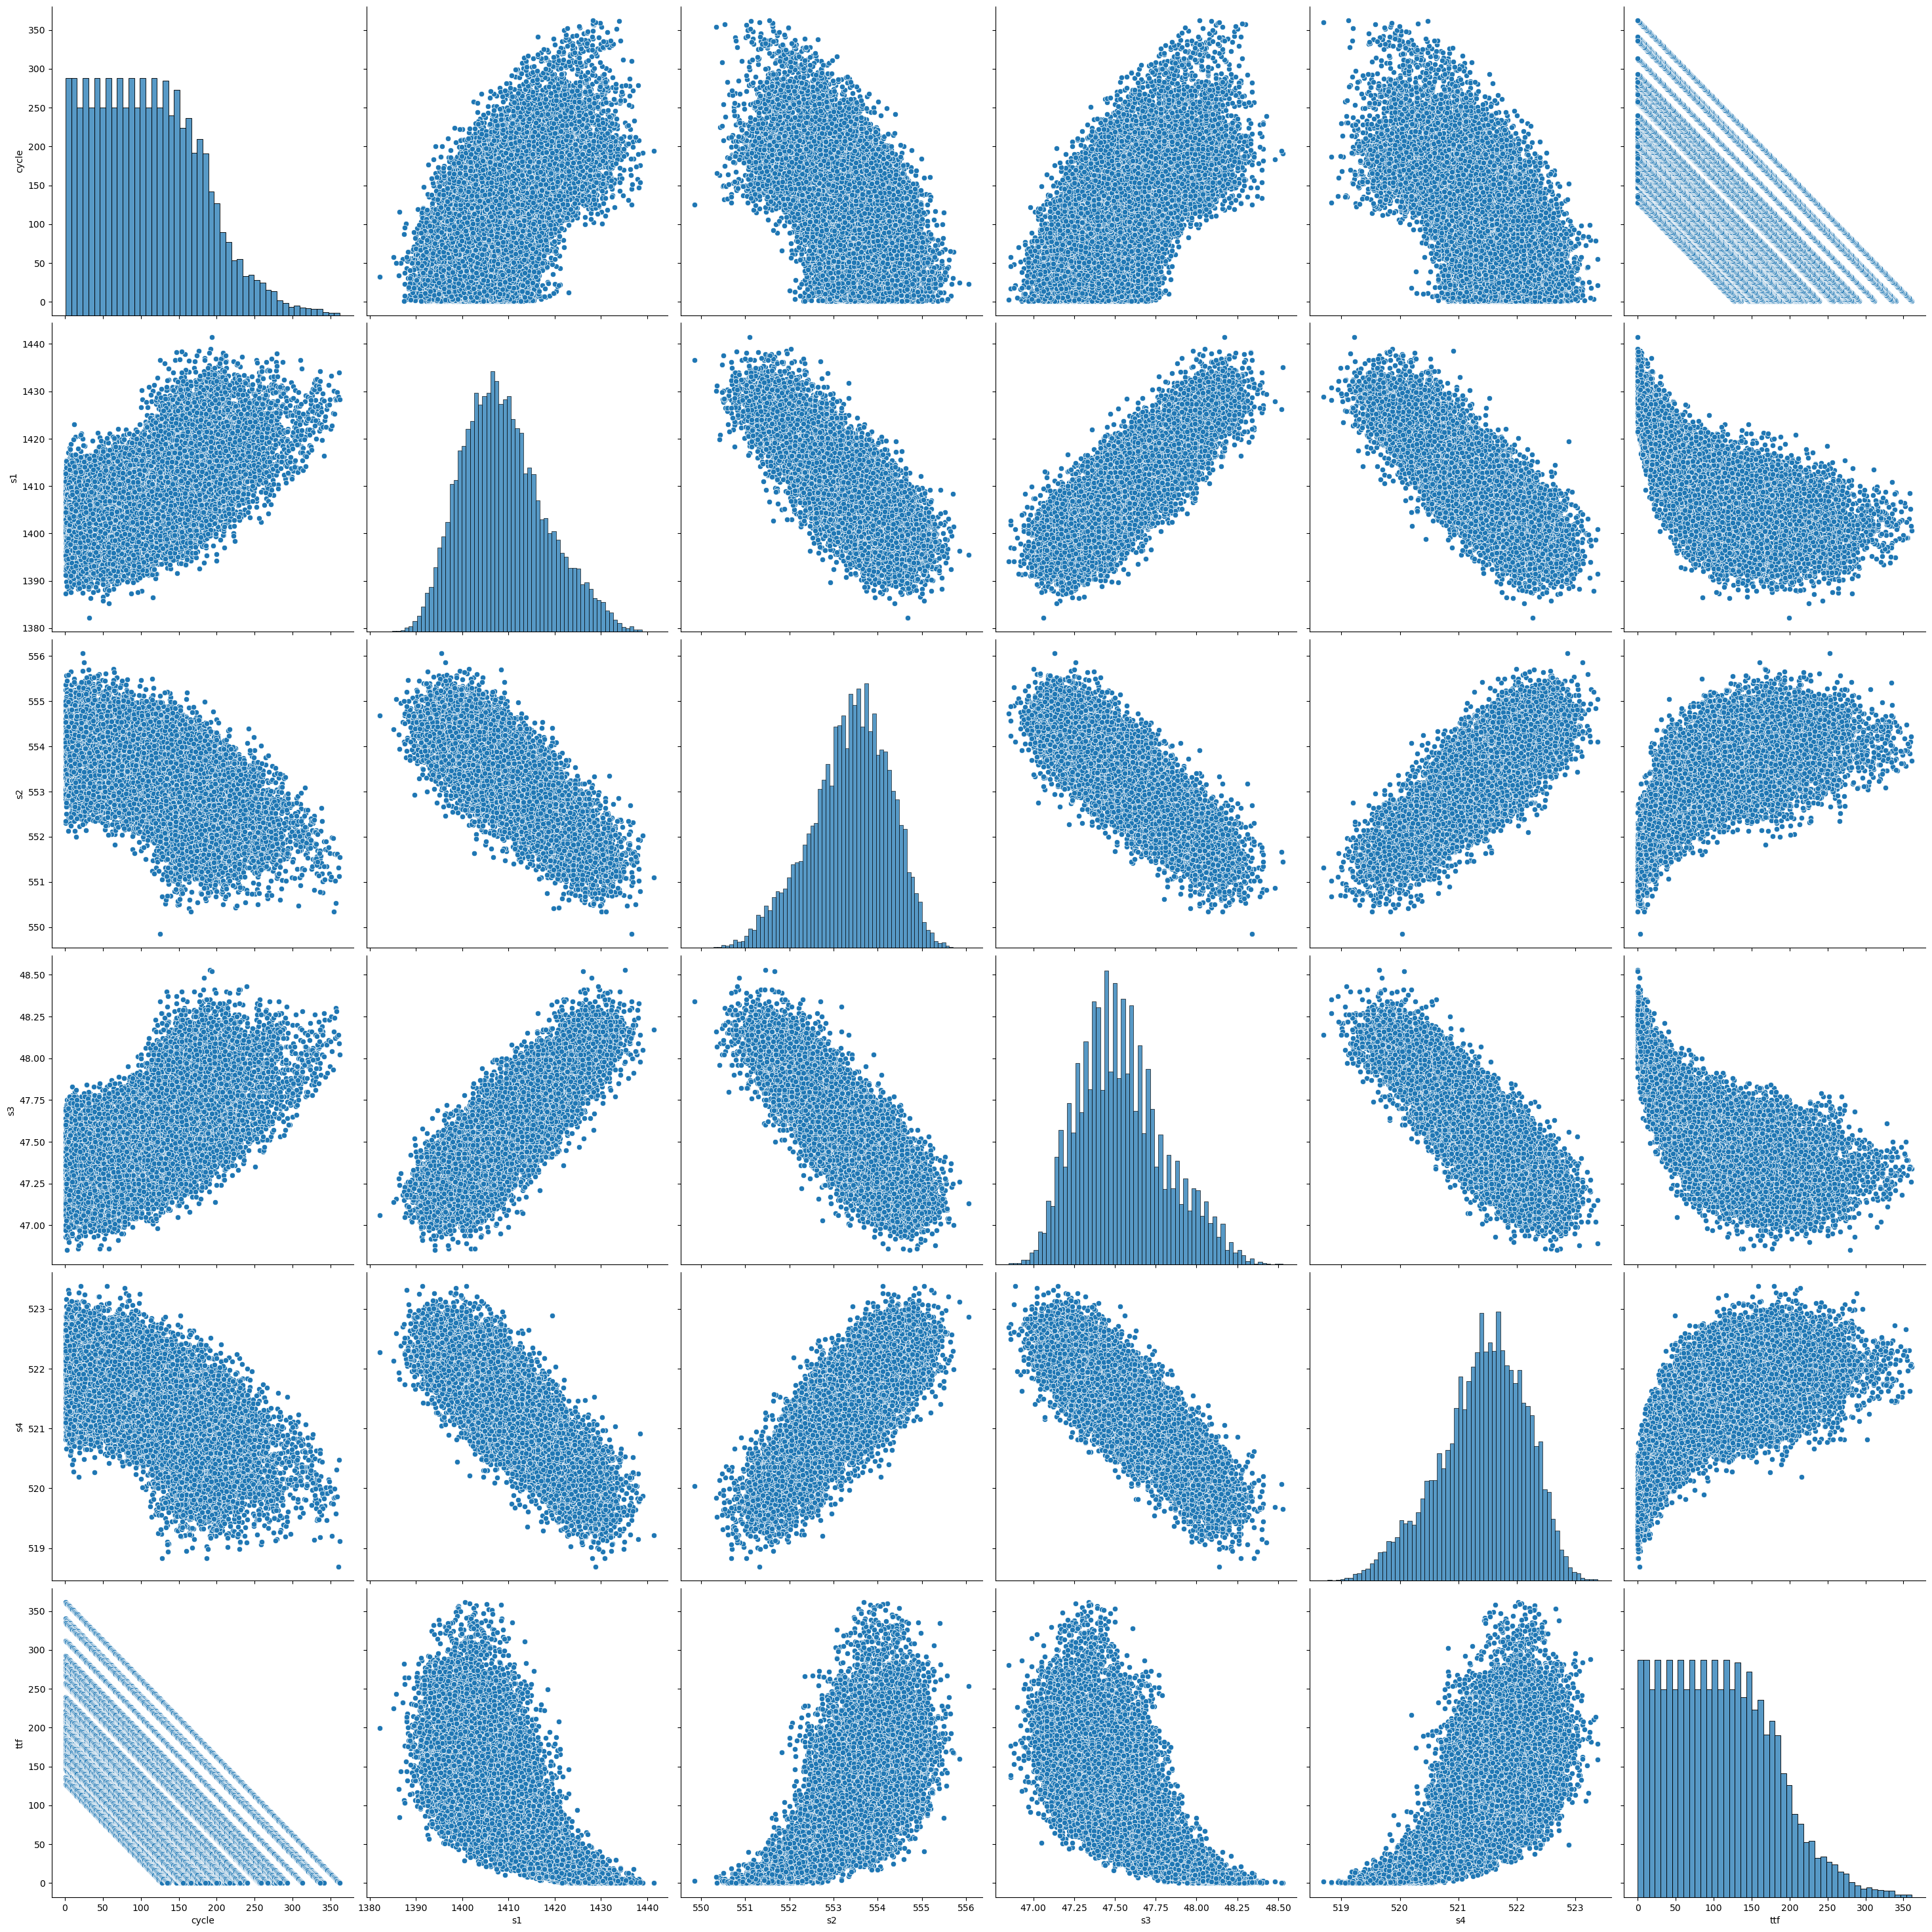

In [36]:
import seaborn as sns
sns.pairplot(data_train[col_study], height = 5)
plt.show()

In [37]:
data_train[col_study].corr()

cycle        s1        s2        s3        s4       ttf
cycle  1.000000  0.624577 -0.595914  0.634385 -0.611354 -0.736241
s1     0.624577  1.000000 -0.793130  0.830136 -0.815591 -0.678948
s2    -0.595914 -0.793130  1.000000 -0.822805  0.812713  0.657223
s3     0.634385  0.830136 -0.822805  1.000000 -0.846884 -0.696228
s4    -0.611354 -0.815591  0.812713 -0.846884  1.000000  0.671983
ttf   -0.736241 -0.678948  0.657223 -0.696228  0.671983  1.000000

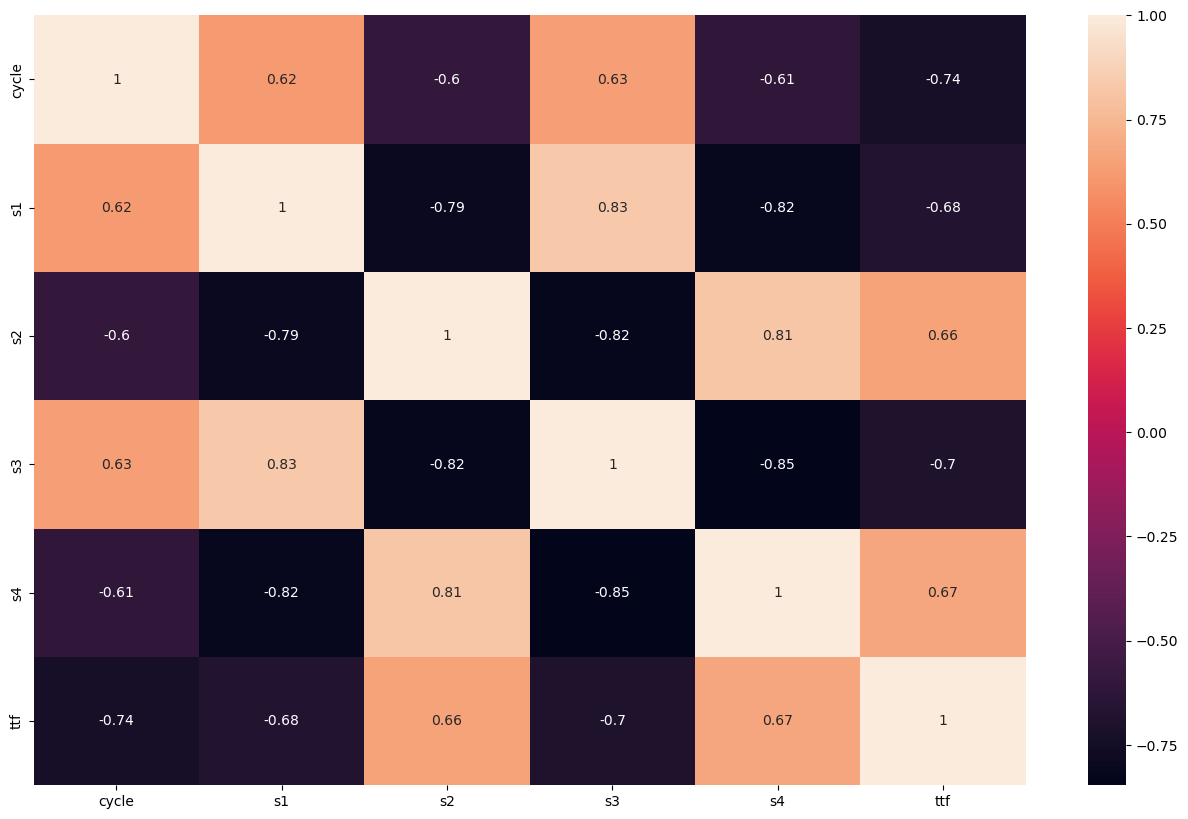

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(data_train[col_study].corr(), annot=True)
plt.show()

In [39]:
sns.boxplot(data_train['ttf'], orient='v')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='ttf'>

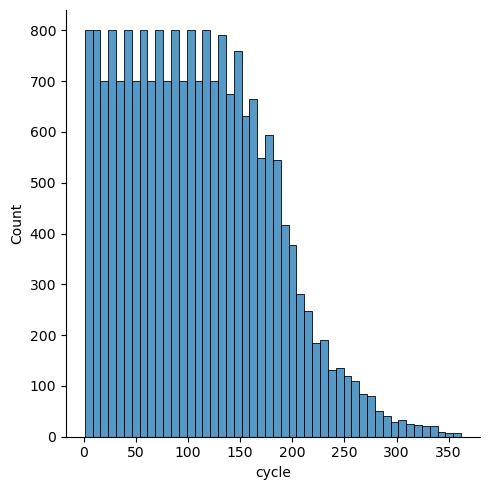

In [44]:
cycle = sns.displot(data_train['cycle'])
plt.show()

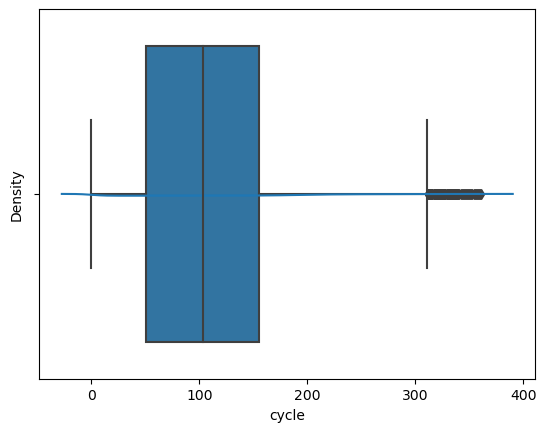

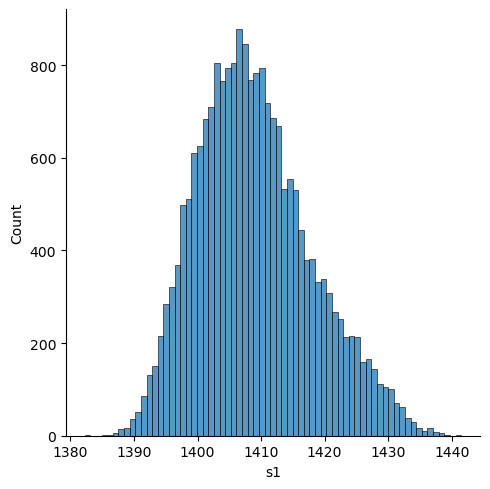

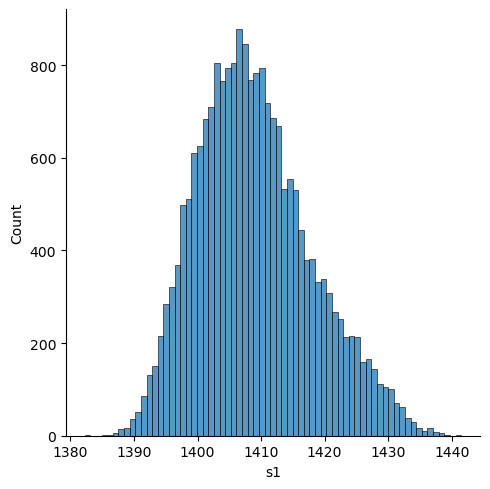

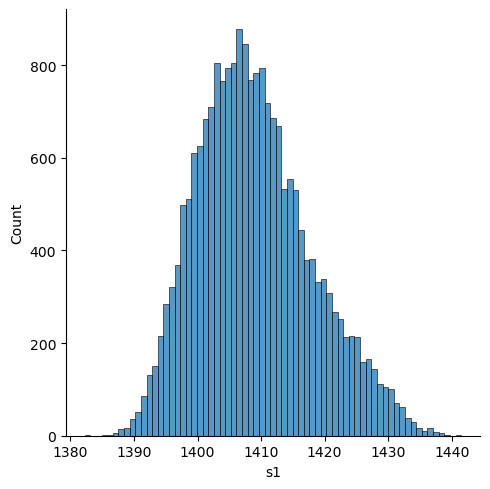

In [43]:
s1 = sns.displot(data_train['s1'])
plt.show()

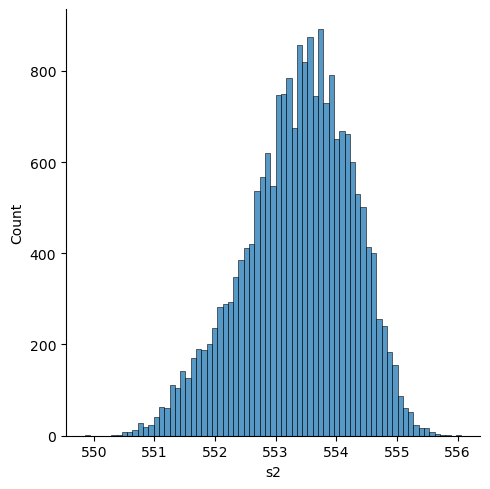

In [45]:
s2 = sns.displot(data_train['s2'])
plt.show()

In [12]:
sns.distplot(data_train['s3'])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s3', ylabel='Density'>

In [13]:
sns.distplot(data_train['s4'])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s4', ylabel='Density'>

In [14]:
sns.distplot(data_train['ttf'])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ttf', ylabel='Density'>

In [15]:
X_train = data_train.drop(['id','ttf', 'label_bnc'],axis=1).values
y_train = data_train['ttf'].values
X_train

array([[1.00000e+00, 1.40060e+03, 5.54360e+02, 4.74700e+01, 5.21660e+02],
       [2.00000e+00, 1.40314e+03, 5.53750e+02, 4.74900e+01, 5.22280e+02],
       [3.00000e+00, 1.40420e+03, 5.54260e+02, 4.72700e+01, 5.22420e+02],
       ...,
       [1.98000e+02, 1.42818e+03, 5.50940e+02, 4.80900e+01, 5.20010e+02],
       [1.99000e+02, 1.42653e+03, 5.50680e+02, 4.83900e+01, 5.19670e+02],
       [2.00000e+02, 1.43214e+03, 5.50790e+02, 4.82000e+01, 5.19300e+02]])

In [16]:
data_test = pd.read_csv('test.csv')
data_test.head()

id  cycle       s1      s2     s3      s4      av1     av2    av3     av4  \
0   1     31  1398.91  554.42  47.23  521.79  1398.91  554.42  47.23  521.79   
1   2     49  1410.83  553.52  47.67  521.74  1410.83  553.52  47.67  521.74   
2   3    126  1418.89  552.59  47.88  520.83  1418.89  552.59  47.88  520.83   
3   4    106  1406.88  552.64  47.65  521.88  1406.88  552.64  47.65  521.88   
4   5     98  1419.36  553.29  47.46  521.00  1419.36  553.29  47.46  521.00   

   sd1  sd2  sd3  sd4  ttf  label_bnc  
0  0.0  0.0  0.0  0.0  112          0  
1  0.0  0.0  0.0  0.0   98          0  
2  0.0  0.0  0.0  0.0   69          0  
3  0.0  0.0  0.0  0.0   82          0  
4  0.0  0.0  0.0  0.0   91          0

In [17]:
X_test = data_test.drop(['id','ttf', 'label_bnc','av1', 'av2', 'av3', 'av4', 'sd1', 'sd2', 'sd3', 'sd4'],axis=1).values
y_test = data_test['ttf'].values
X_test

array([[  31.  , 1398.91,  554.42,   47.23,  521.79],
       [  49.  , 1410.83,  553.52,   47.67,  521.74],
       [ 126.  , 1418.89,  552.59,   47.88,  520.83],
       [ 106.  , 1406.88,  552.64,   47.65,  521.88],
       [  98.  , 1419.36,  553.29,   47.46,  521.  ],
       [ 105.  , 1404.49,  553.73,   47.51,  521.56],
       [ 160.  , 1413.57,  553.42,   47.32,  522.32],
       [ 166.  , 1413.89,  553.51,   47.59,  520.53],
       [  55.  , 1410.27,  552.58,   47.58,  521.65],
       [ 192.  , 1398.99,  552.88,   47.59,  521.82],
       [  83.  , 1414.22,  552.8 ,   47.67,  520.74],
       [ 217.  , 1409.64,  553.36,   47.37,  522.03],
       [ 195.  , 1414.51,  553.28,   47.52,  521.3 ],
       [  46.  , 1408.35,  553.75,   47.57,  520.66],
       [  76.  , 1400.61,  554.08,   47.25,  522.12],
       [ 113.  , 1401.  ,  554.6 ,   47.37,  521.77],
       [ 165.  , 1412.54,  553.49,   47.55,  521.52],
       [ 133.  , 1419.18,  553.36,   47.7 ,  521.06],
       [ 135.  , 1406.32,  5

In [18]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)


LinearRegression()

In [19]:
#Predicting values using X_test
y_pred = ml.predict(X_test)
print(y_pred)

[175.40640635 131.39226651  66.53052265 105.51839746 102.55273159
 118.5423601   97.80580763  68.82925283 126.06358908  77.5230232
  99.73625558  70.70458012  63.12699046 131.627765   153.23504681
 131.54790002  80.4544908   77.72527277 110.32794545  24.87231668
 106.64406469 153.30961061 125.87675522  57.13422432 151.48341902
 146.07233512 101.09877928  88.00025694  95.22958887  86.59974744
  19.40028071 107.14314316 121.83171462  -3.85614622   1.88250593
  55.19818901  80.49835398  84.61223891 169.68160376  59.91887248
  80.95759079  33.54662349  56.06995313 127.69013579  79.17084475
  70.77115686 130.76094706 128.94523553 -33.40004462 138.58402909
  95.80879831  65.97817104  60.07529297 137.67156052 120.48848238
  43.44765691  75.35527877  54.89615899 146.50515606  98.39074561
  61.08731129  55.1533433   67.13759419  53.14806405 170.59786133
  47.44291136 145.82542897  17.62241698 149.89245648  84.74174854
 148.84354775  91.4676111  140.12484334  91.38155929 134.12431444
  12.526028

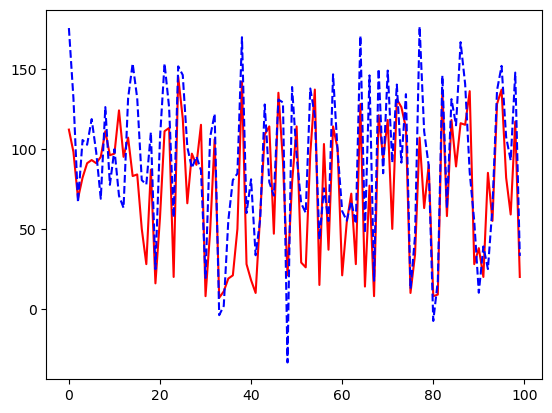

In [46]:
#Plotting actual vs predicted values
import matplotlib.pyplot as plt
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,label = 'Observed', color= 'r', linestyle='-')
plt.plot(x_ax,y_pred,label = 'Predicted', color= 'b', linestyle='--')
plt.show()

In [47]:
pred_y_df = pd.DataFrame({
                'Actual' : y_test,
                'Prediction' : y_pred,
                'Difference' : y_test-y_pred
            })
    
pred_y_df

Actual  Prediction  Difference
0      112  175.406406  -63.406406
1       98  131.392267  -33.392267
2       69   66.530523    2.469477
3       82  105.518397  -23.518397
4       91  102.552732  -11.552732
..     ...         ...         ...
95     137  151.784367  -14.784367
96      82  107.320947  -25.320947
97      59   92.741067  -33.741067
98     117  147.606006  -30.606006
99      20   33.111354  -13.111354

[100 rows x 3 columns]

In [48]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

32.360896739197585

In [49]:
from sklearn.metrics import r2_score
R_square = r2_score(y_test, y_pred)
R_square

0.3935687803149648

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

1047.2276377650087